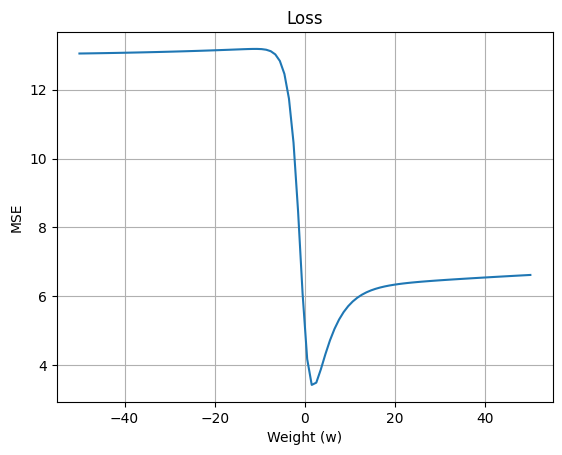

In [494]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random


def sigmoid(w, x):
  return 1 / (1 + np.exp(-w * x))

def linear(w, x):
  return w*x


def get_activation(activation):

    if activation=='linear':
        return linear

    elif activation=='sigmoid':
         return sigmoid

    else:
        raise ValueError(f"Unsupported activation: {activation}")


def simulate_loss(problem, activation, lossfun, n,  w_values):

    X = []  
    Y = []
    results = []
    
    # -----------------------
    # Creazione datase fake
    # ----------------------

    for i in range(n):

        if problem=='linear':
          x = i
          y = 2*i
        
        elif problem=='binary_classification':
          x = random.uniform(0, 1)
          y = 0 if x < 0.5 else 1
        
        else:
          raise ValueError(f"Unsupported problem: {problem}")

        X.append( x )
        Y.append( y )
    
    # -----------------------
    # Funzione di costo
    # ----------------------

    act = get_activation(activation)

    for w in w_values:


        if lossfun=='mse':
          loss = sum(  ( y - act(w, x) )**2 for x, y in zip(X, Y) )


        elif lossfun=='bce':
              epsilon = 1e-10  # Small epsilon value to avoid math domain error
              loss = -sum(y * np.log(act(w, x) + epsilon) + (1 - y) * np.log(1 - act(w, x) + epsilon) for x, y in zip(X, Y))
        
        else:
          raise ValueError(f"Unsupported loss function: {lossfun}")  
        
        
        results.append( (w, loss) )


    return results
        

n = 20
w_values = np.linspace(-50, 50, 100) 

results = simulate_loss(problem='binary_classification', activation='sigmoid', lossfun='mse', n=n, w_values=w_values)

weights, losses = zip(*results)

plt.plot(weights, losses)
plt.xlabel('Weight (w)')
plt.ylabel('MSE')
plt.title('Loss')
plt.grid(True)
plt.show()

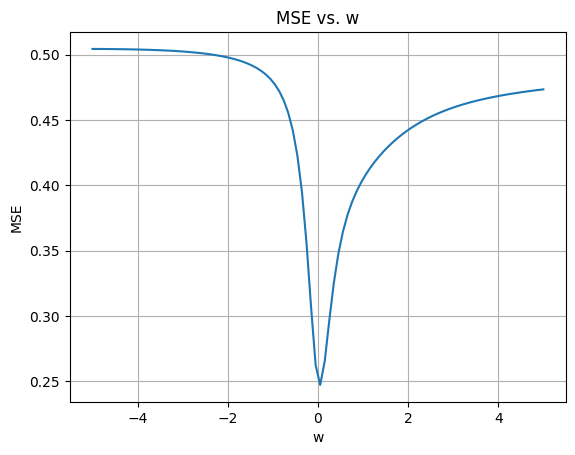

In [490]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = np.random.randint(0, 2, size=(100, 1))

# Define a range of values for w
w_values = np.linspace(-5, 5, 100)

# Calculate the MSE for each value of w
mse_values = []
for w in w_values:
    y_pred = 1 / (1 + np.exp(-w * X))
    mse = np.mean((y_pred - y) ** 2)
    mse_values.append(mse)

# Plot the MSE vs. w
plt.plot(w_values, mse_values)
plt.xlabel('w')
plt.ylabel('MSE')
plt.title('MSE vs. w')
plt.grid(True)
plt.show()

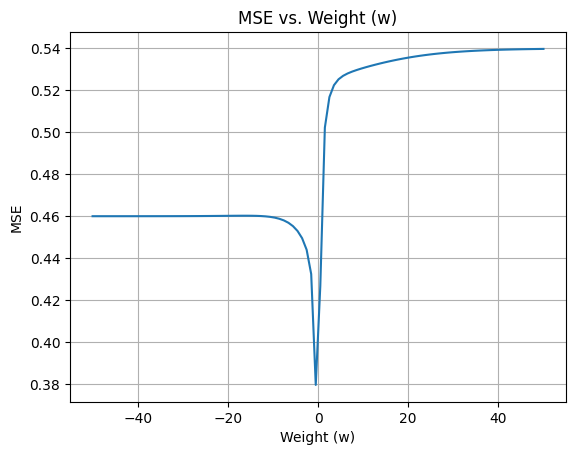

In [491]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def binary_classification_mse(w, x, y):
    y_pred = sigmoid(w * x)
    return mse(y, y_pred)

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-10, 10, 100)
y = np.random.randint(0, 2, size=100)

# Calculate MSE for different values of w
w_values = np.linspace(-50, 50, 100)
mse_values = [binary_classification_mse(w, x, y) for w in w_values]

# Plotting
plt.plot(w_values, mse_values)
plt.xlabel('Weight (w)')
plt.ylabel('MSE')
plt.title('MSE vs. Weight (w)')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 3ms/step


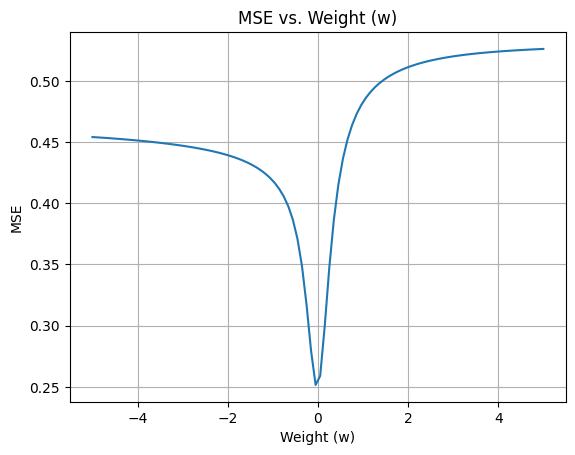

In [489]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-10, 10, 100)
y = np.random.randint(0, 2, size=100)

# Custom layer with trainable weight parameter
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomLayer, self).__init__()
        self.w = tf.Variable(initial_value=0.0, trainable=True)

    def call(self, inputs):
        return tf.sigmoid(self.w * inputs)

# Define the model
model = tf.keras.Sequential([
    CustomLayer()
])

# Compile the model
model.compile(optimizer='sgd', loss='mse')

# Calculate MSE for different values of w
w_values = np.linspace(-5, 5, 100)
mse_values = []

for w in w_values:
    # Set the weight value in the custom layer
    model.layers[0].w.assign(w)

    # Predict using the model and calculate MSE
    y_pred = model.predict(x)
    mse = np.mean((y - y_pred.flatten()) ** 2)
    mse_values.append(mse)

# Plotting
plt.plot(w_values, mse_values)
plt.xlabel('Weight (w)')
plt.ylabel('MSE')
plt.title('MSE vs. Weight (w)')
plt.grid(True)
plt.show()
